In [1]:
# Data Visualisation Study I
# In this notebook we attempt to visualise the Dataset retrieved from (...) for better understanding

In [30]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# loading dataset
data1 = pd.read_csv('data/mpa4_class.profile', sep='\t')
# print head of dataset
print(data1.head())

                     name    850945    907005    907544    907995    910252  \
0           c__Clostridia  51.07453  19.25384  34.13202  40.45823  63.65824   
1          c__Bacteroidia  42.97830  67.00596  26.10095  49.82172  26.47992   
2        c__Negativicutes   2.08592   2.70182   0.41849   2.10271   3.52240   
3  c__Gammaproteobacteria   1.28249   9.25834  36.41831   0.00000   0.42619   
4   c__Betaproteobacteria   0.93501   0.95815   0.00000   3.79642   0.46030   

     917369    920071     A0002     A0005  ...  self_CRC23  self_CRC24  \
0  43.67910  48.12092  43.68023   6.24566  ...    53.93475    34.40354   
1  44.99695  30.36404  50.71171  88.15693  ...    26.12067     7.49449   
2   2.13157   8.24484   0.47678   0.81488  ...     6.59048     1.46674   
3   5.68301   0.00579   0.00000   0.20769  ...     1.93735     0.20606   
4   0.93574   1.52207   0.34718   1.96452  ...     0.04980     0.08714   

   self_CRC26  self_CRC28  self_CRC30  self_CRC31  self_CRC34  self_CRC35  \
0  

In [33]:
# rows --> bacterial classes (Clostridia, Bacteroidia, Negativicutes, Gammaproteobacteria, Betaproteobacteria)
# columns --> different patients/samples; self_(...) columns likely refer to different disease samples, the others are likely samples of people without a known/identified disease

In [35]:
print(data1.describe())


# some explanations of the output
# count: The number of non-null (non-missing) entries in each column. This helps identify if there are any missing values in your data.
# mean: The average value of the column. This gives an idea of the central tendency of the data.
# std: The standard deviation, which measures the amount of variation or dispersion of the values from the mean. A high standard deviation indicates that the values are spread out over a wider range.
# min: The minimum value in the column. This helps to understand the lower bounds of the data.
# 25% (Q1): The first quartile (25th percentile), which means that 25% of the data points are below this value. This helps to assess the lower distribution of the data.
# 50% (Median or Q2): The median value, which is the middle point of the data. Half the data points are below this value and half are above.
# 75% (Q3): The third quartile (75th percentile), indicating that 75% of the data points are below this value. This helps to assess the upper distribution of the data.
# max: The maximum value in the column. This indicates the upper bounds of the data. 

           850945      907005      907544      907995      910252      917369  \
count  185.000000  185.000000  185.000000  185.000000  185.000000  185.000000   
mean     0.540541    0.540540    0.540541    0.540540    0.540540    0.540541   
std      4.895278    5.160939    4.120350    4.712969    5.066484    4.614615   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max     51.074530   67.005960   36.418310   49.821720   63.658240   44.996950   

           920071       A0002       A0005       A0006  ...  self_CRC23  \
count  185.000000  185.000000  185.000000  185.000000  ...  185.000000   
mean     0.540540    0.540540    0.540541    0.540541  ...    0.540541   
std      4.244443    4.907267    6.495762    4.5

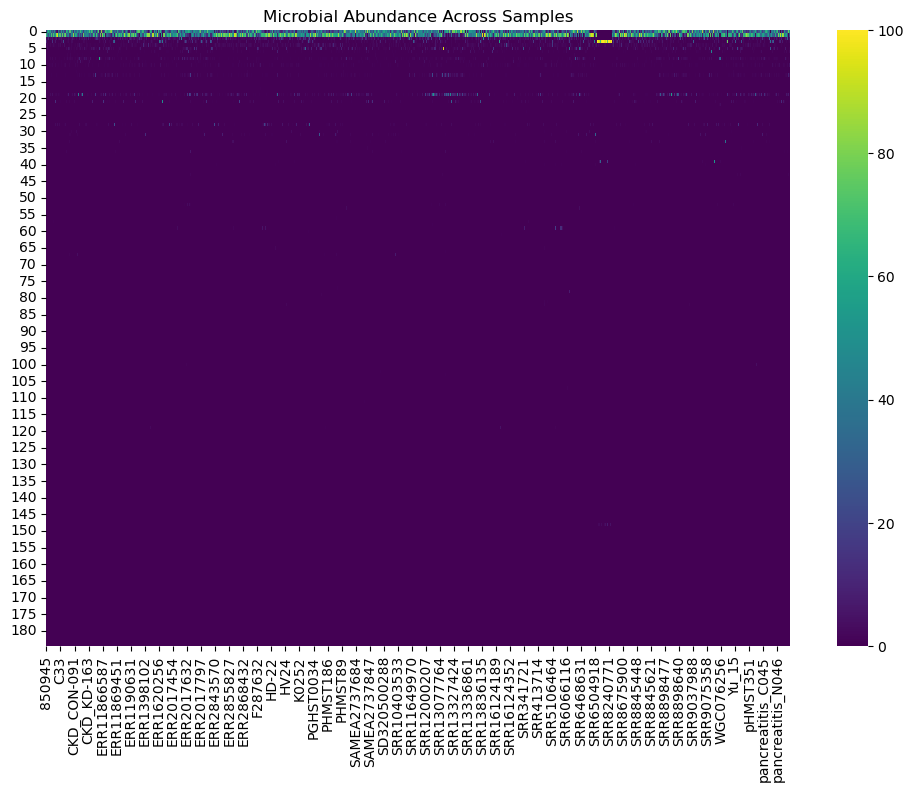

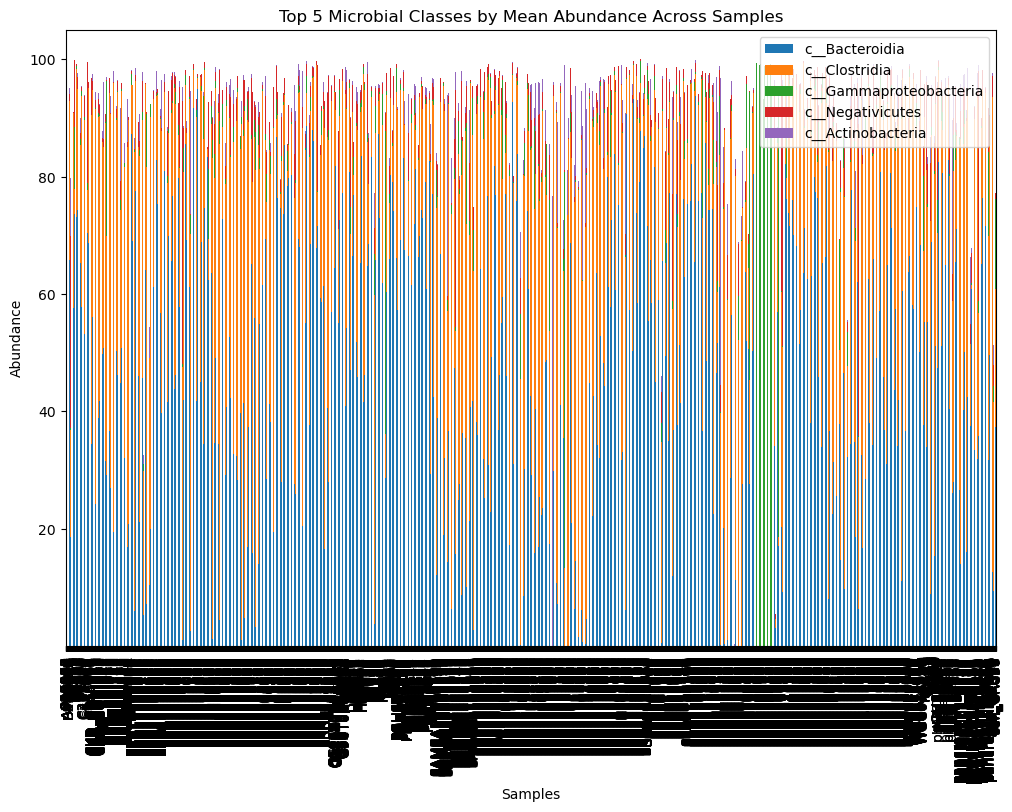

In [29]:
# data visualization

# create a heatmap (I)
# remove the name column to focus on numerical data
data_values = data1.drop(columns=['name'])

# plotting
plt.figure(figsize=(12,8))
sns.heatmap(data_values.astype(float), cmap='viridis')
plt.title('Microbial Abundance Across Samples')
plt.show()

# create a bar diagram (II)
# filter to get top 5 classes based on mean abundance
top_classes = data1.set_index('name').mean(axis=1).nlargest(5).index
filtered_data = data1[data1['name'].isin(top_classes)]

# plotting
filtered_data = data1.set_index('name').loc[top_classes]

filtered_data.T.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Top 5 Microbial Classes by Mean Abundance Across Samples')
plt.ylabel('Abundance')
plt.xlabel('Samples')
plt.legend(loc='upper right')
plt.show()

In [19]:
# does the data need to be cleaned?
# check for NaNs
print(data1.isna().sum())

# check for zeros 
zero_counts = (data1 == 0).sum()
print(zero_counts)

name          0
850945        0
907005        0
907544        0
907995        0
             ..
self_CRC31    0
self_CRC34    0
self_CRC35    0
self_CRC36    0
self_CRC37    0
Length: 8627, dtype: int64
name            0
850945        168
907005        176
907544        176
907995        169
             ... 
self_CRC31    175
self_CRC34    167
self_CRC35    170
self_CRC36    172
self_CRC37    174
Length: 8627, dtype: int64


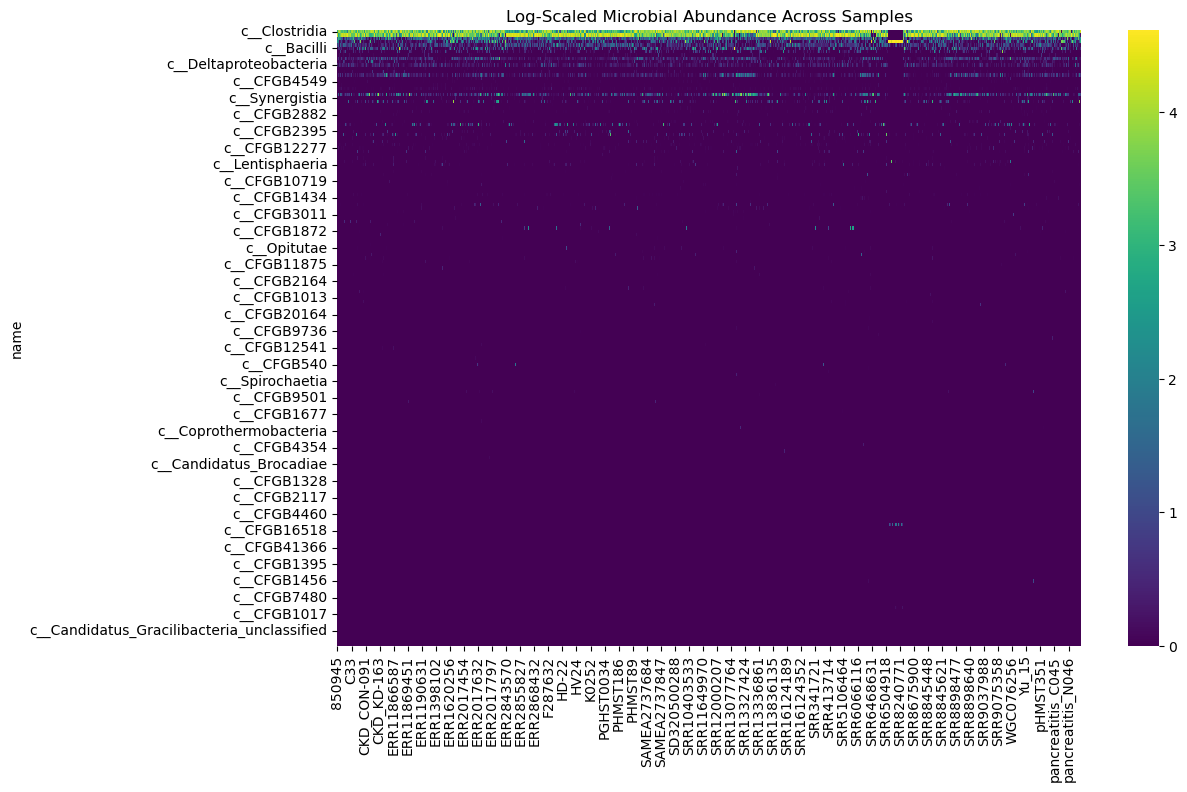

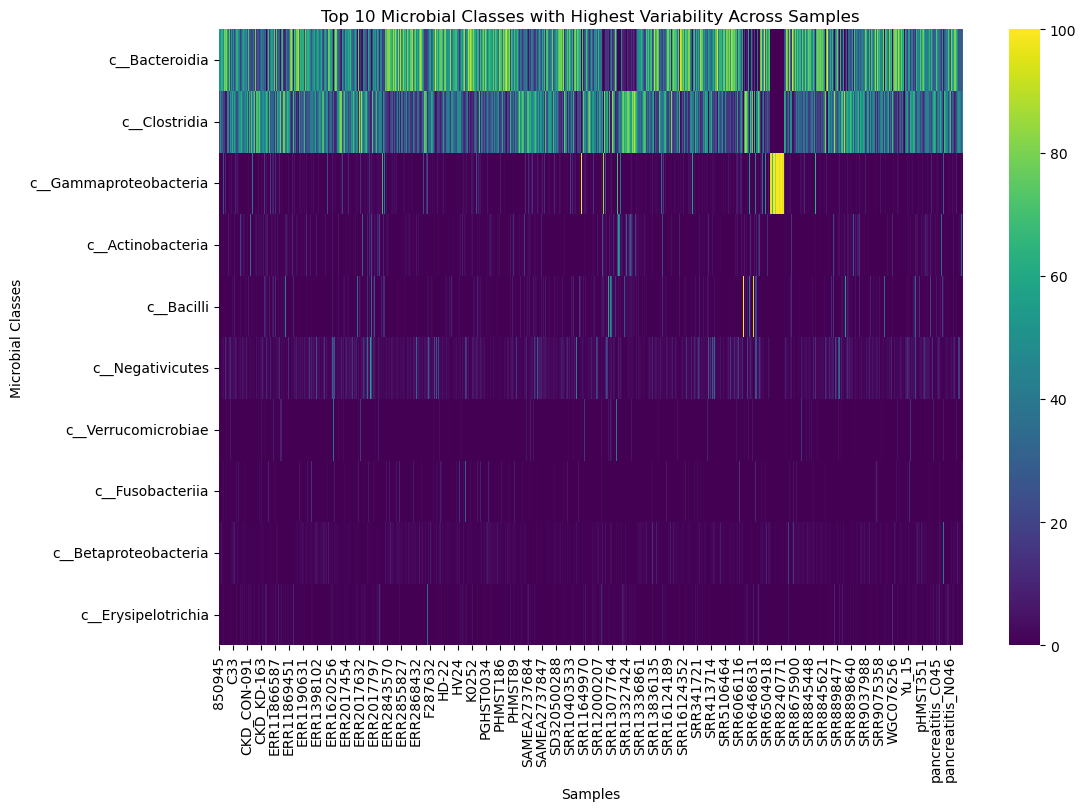

In [45]:
# improving the heatmap 
# attempt 1: apply log transformation to compress the range of values
log_data_values = np.log1p(data_values)

plt.figure(figsize=(12, 8))
sns.heatmap(log_data_values, cmap='viridis')
plt.title('Log-Scaled Microbial Abundance Across Samples')
plt.show()

# attempt 2: find std. dev. and filter for the microbial data with the highest variability

# retain microbial class names (for printing later)
data_values = data1.set_index('name')

# compute the standard deviation (variability) for each microbial class
variability = data_values.std(axis=1)

# get the top 10 classes with the highest variability
top_variable_classes = variability.nlargest(10).index

# filter the original data for these top variable classes
filtered_data_heat = data_values.loc[top_variable_classes]

# plot a heatmap for the top variable classes
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data_heat.astype(float), cmap='viridis')
plt.title('Top 10 Microbial Classes with Highest Variability Across Samples')
plt.ylabel('Microbial Classes')
plt.xlabel('Samples')
plt.show()

In [25]:
# description of heat map: 
# X-axis: Represents the different microbial classes ("name" column, like c__Clostridia, c__Bacteroidia, etc.).
# Y-axis: Represents the sample IDs (columns like 850945, 907005, self_CRC23, etc.).
# Cell Values: The color intensity in each cell represents the microbial abundance in each sample for a given microbial class.

# observations from heat map: 
# 

# description of bar chart:
# observations from bar chart: